In [24]:
import torch
from torch import nn, optim
from torch.utils.data import TensorDataset, DataLoader

# Divide Data as Training-Set and Verification-Set.
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

digits = load_digits()

In [25]:
X = digits.data
Y = digits.target

X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

# Re-define variables that got data from train_test_split() function.
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.int64)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.int64)

In [26]:
# Create DataSet
ds = TensorDataset(X, Y)

# Create Data-Loader that returns each of 64 data by shffles sequence.
loader = DataLoader(
    ds, batch_size=64, shuffle=True
)

In [45]:
# Add a Dropout to each Layer that randomly disposes 
# the dimension of a variable with a probability of 0.5.
# k = 100
# net = nn.Sequential(
#     nn.Linear(64, k),
#     nn.ReLU(),
#     nn.Dropout(0.5),
    
#     nn.Linear(k, k),
#     nn.ReLU(),
#     nn.Dropout(0.5),
    
#     nn.Linear(k, k),
#     nn.ReLU(),
#     nn.Dropout(0.5),
    
#     nn.Linear(k, k),
#     nn.ReLU(),
#     nn.Dropout(0.5),
    
#     nn.Linear(k, 10)
# )

# Apply 'BatchNorm1d' into Linear-Layer.
k = 100
net = nn.Sequential(
    nn.Linear(64, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    
    nn.Linear(k, k),
    nn.ReLU(),
    nn.BatchNorm1d(k),
    
    nn.Linear(k, 10)
)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters())

In [46]:
train_losses = []
test_losses = []

for epoch in range(100):
    running_loss = 0.0
    # Set Neural-Network as a Training-Mode.
    net.train()
    
    for i, (xx, yy) in enumerate(loader):
        y_pred = net(xx)
        loss = loss_fn(y_pred, yy)
        optimizer.zero_grad()
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
    train_losses.append(running_loss / i)
    
    # Set the neural network into evaluation mode 
    # and calculate the loss function of the verification data.
    net.eval()
    y_pred = net(X_test)
    test_loss = loss_fn(y_pred, Y_test)
    test_losses.append(test_loss.item())

    print("After trained each data of running_loss : ", running_loss)


After trained each data of running_loss :  42.817539274692535
After trained each data of running_loss :  16.948778122663498
After trained each data of running_loss :  9.319370359182358
After trained each data of running_loss :  4.900746129453182
After trained each data of running_loss :  3.677709087729454
After trained each data of running_loss :  4.740220360457897
After trained each data of running_loss :  3.20699168369174
After trained each data of running_loss :  2.865608546882868
After trained each data of running_loss :  2.5669742971658707
After trained each data of running_loss :  1.3722136579453945
After trained each data of running_loss :  1.4520196095108986
After trained each data of running_loss :  1.440604530274868
After trained each data of running_loss :  0.9417640119791031
After trained each data of running_loss :  0.9616775289177895
After trained each data of running_loss :  1.6023657470941544
After trained each data of running_loss :  2.6944546923041344
After trained ea

Train-Losses and Test-Losses


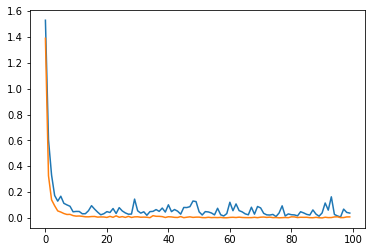

In [47]:
%matplotlib inline
from matplotlib import pyplot as plt

print("Train-Losses and Test-Losses")
plt.plot(train_losses)
plt.plot(test_losses)